$f(x) = x^2$


In [6]:
from __future__ import division

% matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from functions import function1, taninv, trapezoid_integrate, trapezoid_integrate_for_loop

size=(10,8)

In [2]:
# Step 2


start= 0.0
stop= 5.0
num= 51												# to include the last element and avoid obo error
vector= np.linspace(start, stop, num)				# calling x vector


values= function1(vector)


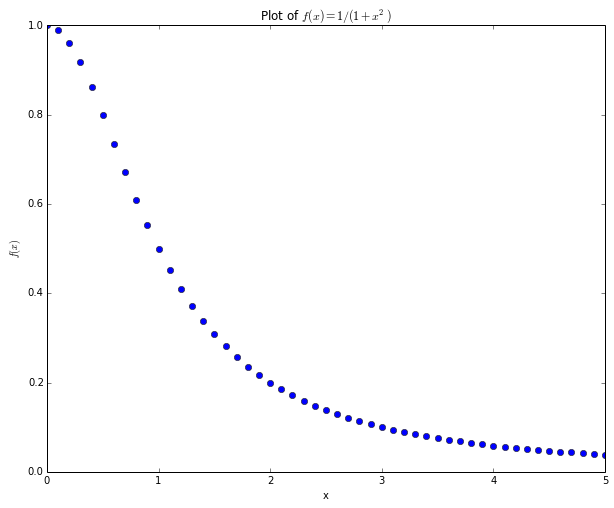

In [3]:
##########
# Step 3

plt.figure(0, figsize= size)
plt.plot(vector, values, "bo")
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("""Plot of $f(x) = 1/(1+x^2) $""")
plt.show()
plt.close()


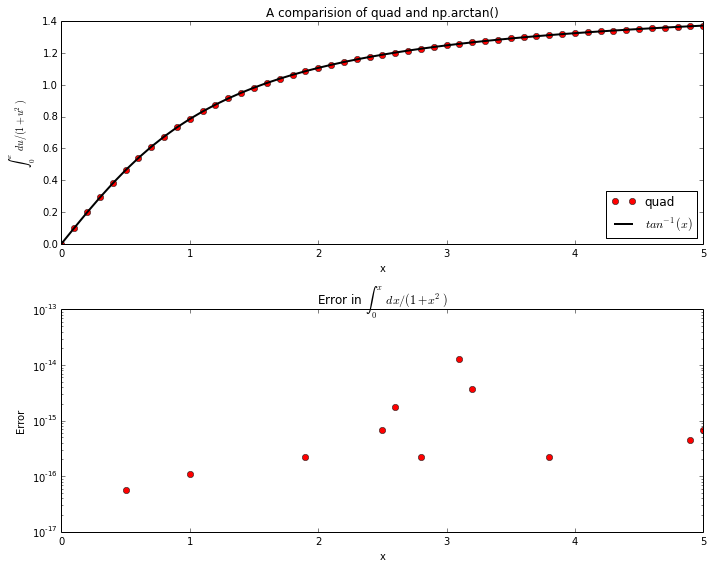

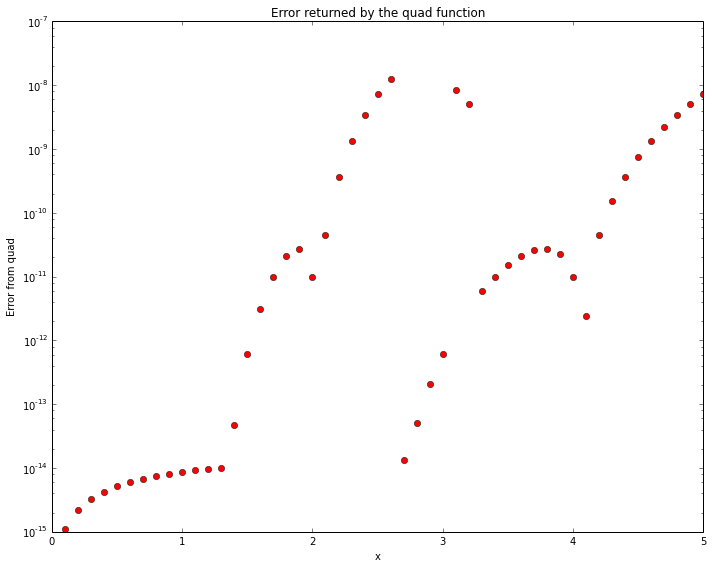

In [4]:
###########
# Step 4

taninv_calculated= np.array(taninv(vector)[:,0])							# remember that the quad function returns (integral, error)
taninv_actual= np.arctan(vector)
error= taninv_calculated- taninv_actual




plt.figure(1, figsize= size)

plt.subplot(211)
plt.plot( vector, taninv_calculated, "ro", label= "quad")
plt.plot( vector, taninv_actual, "k-", label="$tan^{-1}(x)$", linewidth=2)
plt.xlabel("x")
plt.ylabel("$\int^x_0 du/(1+u^2) $")
plt.title("A comparision of quad and np.arctan()")
plt.legend(loc= "lower right")

plt.subplot(212)
plt.semilogy(vector, error, "ro")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error in $\int^x_0 dx/(1+x^2) $")
plt.tight_layout()
plt.show()
plt.close()


plt.figure(2, figsize= size)
plt.semilogy(vector, (taninv(vector))[:,1], "ro")
plt.xlabel("x")
plt.ylabel("Error from quad")
plt.title("Error returned by the quad function")

plt.tight_layout()												# ensures reasonable gaps between the first subplot and the second				
plt.show()

plt.close()


In [5]:
###########
# Step 5

import time as t

# vectorised code
t1= t.time()
print trapezoid_integrate(0,5,0.1,function1)
t2= t.time()
print t2-t1
# code with the for trapezoid_integrate_for_loop
t1= t.time()
print trapezoid_integrate_for_loop(0,5,0.1,function1)
t2= t.time()
print t2-t1

# vectorised code
t1= t.time()
print trapezoid_integrate(0,5,0.0001,function1)
t2= t.time()
print t2-t1
# code with the for trapezoid_integrate_for_loop
t1= t.time()
print trapezoid_integrate_for_loop(0,5,0.0001,function1)
t2= t.time()
print t2-t1


[ 0.          0.09950495  0.19708682  0.29103531  0.38001031  0.46311376
  0.53987847  0.61020022  0.67424507  0.73235719  0.7849815   0.83260593
  0.87572217  0.91480133  0.95028059  0.98255709  1.01198665  1.03888507
  1.06353099  1.08616943  1.10701542  1.12625756  1.14406135  1.16057212
  1.17591769  1.19021069  1.20355055  1.21602521  1.22771268  1.23868228
  1.24899578  1.25870832  1.26786925  1.27652286  1.28470897  1.29246345
  1.29981869  1.30680403  1.31344605  1.31976891  1.3257946   1.33154319
  1.337033    1.34228082  1.34730204  1.35211077  1.35672003  1.36114179
  1.3653871   1.36946616  1.37338844]
0.00429105758667
[ 0.          0.09950495  0.19708682  0.29103531  0.38001031  0.46311376
  0.53987847  0.61020022  0.67424507  0.73235719  0.7849815   0.83260593
  0.87572217  0.91480133  0.95028059  0.98255709  1.01198665  1.03888507
  1.06353099  1.08616943  1.10701542  1.12625756  1.14406135  1.16057212
  1.17591769  1.19021069  1.20355055  1.21602521  1.22771268  1.23868

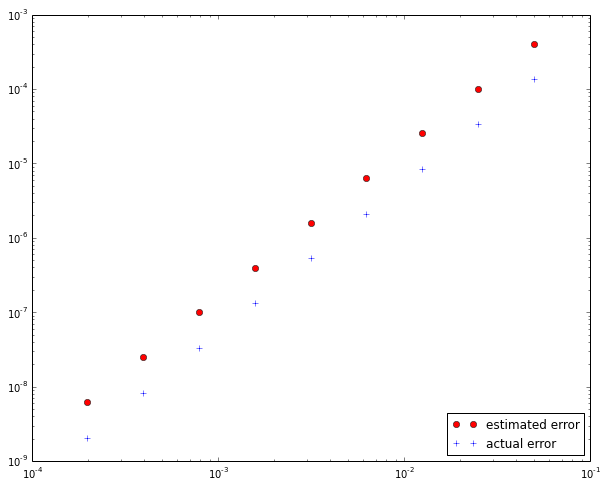

In [13]:

#to determine h
interval_start= 0
interval_end= 1
h= 0.1
hlist=[]

tolerance= 1
integrals=[]
i=1
error=[]

integrals.append(trapezoid_integrate( interval_start, interval_end, h, function1))

while tolerance > 10**(-8):
	h= h/2
	hlist.append(h)
	integrals.append(trapezoid_integrate( interval_start, interval_end, h, function1))
	feed= np.linspace(interval_start, interval_end,((interval_end- interval_start)/h)+1)
	actual_error= max(abs(integrals[i]- np.arctan(feed)))
	error.append( [max( abs( integrals[i][::2]- integrals[i-1])), actual_error])
	i+=1
	tolerance= error[len(error)-1][0]

error= np.array(error)
plt.figure(3, figsize= size)
plt.loglog(hlist, error[:,0],"ro",label="estimated error")
plt.loglog(hlist, error[:,1],"b+",label="actual error")
plt.legend(loc="lower right")
plt.show()
plt.close()
